In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import subprocess
from tensorflow.keras import layers

from pathlib import Path
from collections import Counter

In [ ]:
data_dir = Path("input/")

# Get list of all the images
images = sorted(list(map(str, list(data_dir.glob("*.png")))))
# image chứa đường dẫn của image
labels = [img.split(os.path.sep)[-1].split(".png")[0] for img in images]
characters = set(char for label in labels for char in label)

print("Number of images found: ", len(images))
print("Number of labels found: ", len(labels))
print("Number of unique characters: ", len(characters))
print("Characters present: ", characters)

# Batch size for training and validation
batch_size = 16

# Desired image dimensions
img_width = 128
img_height = 32


downsample_factor = 4

# Maximum length of any captcha in the dataset
max_length = max([len(label) for label in labels])

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("TEST IMAGES: ", test_images.shape)

TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


In [3]:
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [ ]:
def preprocess(img, imgSize ):
    ''' resize, transpose and standardization grayscale images '''
    # create target image and copy sample image into it
    widthTarget, heightTarget = imgSize 
    height, width = img.shape 
    factor_x = width / widthTarget
    factor_y = height / heightTarget

    factor = max(factor_x, factor_y)
    # scale according to factor
    newSize = (min(widthTarget, int(width / factor)), min(heightTarget, int(height / factor)))

    img = cv2.resize(img, newSize)
    target = np.ones(shape=(heightTarget, widthTarget), dtype='uint8') * 255
    target[0:newSize[1], 0:newSize[0]] = img
    # transpose
    img = cv2.transpose(target)
    # standardization
    mean, stddev = cv2.meanStdDev(img)
    mean = mean[0][0]
    stddev = stddev[0][0]
    img = img - mean
    img = img // stddev if stddev > 0 else img
    return img

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0

In [5]:
epochs = 10
history = model.fit(
  train_images, 
  train_labels,
  epochs = epochs
)

Epoch 1/10


C:\Users\Zero\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 113s 59ms/step - loss: 0.1434 - accuracy: 0.9553
Epoch 2/10
1875/1875 [==============================] - 110s 58ms/step - loss: 0.0456 - accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0332 - accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0276 - accuracy: 0.9917
Epoch 5/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0219 - accuracy: 0.9926
Epoch 6/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0177 - accuracy: 0.9939
Epoch 7/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0152 - accuracy: 0.9952
Epoch 8/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0146 - accuracy: 0.9953
Epoch 9/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0114 - accuracy: 0.9961
Epoch 10/10
1875/1875 [==============================] - 110s 59ms

Text(0.5, 1.0, 'Training Accuracy and Loss')

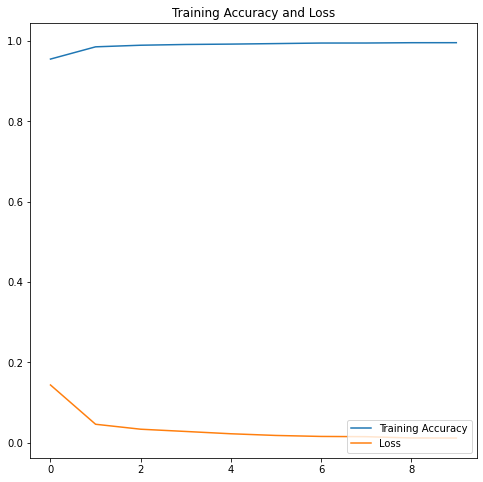

In [6]:
acc = history.history['accuracy']
loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')


Prediction of model: [1.0000000e+00 1.8580040e-06 1.4582408e-02 1.0294661e-04 3.6333557e-04
 8.1359969e-05 9.1184890e-01 3.5983616e-09 5.3991590e-02 5.0758797e-04]


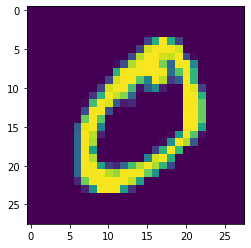

In [10]:
image = (train_images[1]).reshape(1,28,28,1)
model_pred = model.predict(image, verbose=0)

plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

In [8]:
from tensorflow.keras.models import Sequential

Prediction of model: [2.1972914e-08 3.8382336e-03 3.5094619e-03 7.9995814e-08 1.0000000e+00
 1.6281320e-03 1.7913498e-08 5.1622294e-02 7.1609218e-04 4.4282025e-01]


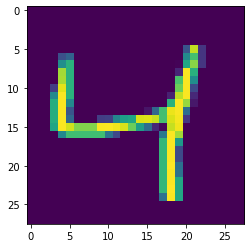

In [12]:
image = (train_images[2]).reshape(1,28,28,1)
model_pred = model.predict(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

Test images array shape: (4, 28, 28)
Predicted digit: [2.36581309e-05 5.16792893e-01 1.00000000e+00 1.13332244e-04
 5.90864875e-05 6.95250732e-11 1.00029763e-04 5.18177729e-03
 1.17331547e-06 4.83876611e-05]
Predicted digit: [4.8999937e-04 9.9999344e-01 3.8041871e-02 6.4928900e-05 4.7696759e-03
 1.3537261e-01 4.2178354e-01 3.0959600e-01 1.4470102e-01 8.5481576e-04]
Predicted digit: [1.0000000e+00 4.1175241e-05 1.1186241e-03 1.9134081e-04 1.4249665e-04
 1.5084441e-02 9.8683625e-01 1.4353758e-06 2.2572221e-02 2.9408548e-03]
Predicted digit: [8.3206563e-05 1.8423198e-04 3.7122404e-04 3.0264686e-04 9.9999881e-01
 2.1331140e-03 1.7971997e-04 3.0478234e-03 5.6018453e-02 9.3284971e-01]


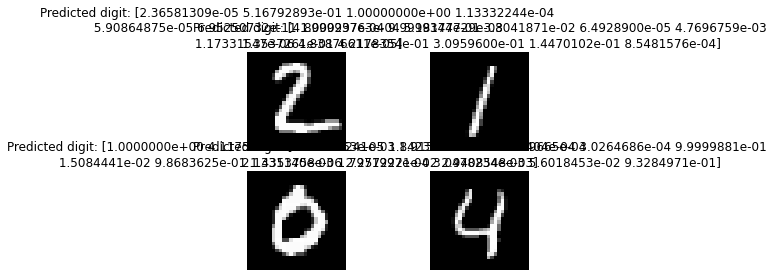

In [13]:

images = test_images[1:5]
images = images.reshape(images.shape[0], 28, 28)
print ("Test images array shape: {}".format(images.shape))


for i, test_image in enumerate(images, start=1):

    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()


In [14]:
model.save("tf-cnn-model.h5")

In [15]:
loaded_model = models.load_model("tf-cnn-model.h5")

Prediction of model: [2.1972914e-08 3.8382336e-03 3.5094619e-03 7.9995814e-08 1.0000000e+00
 1.6281320e-03 1.7913498e-08 5.1622294e-02 7.1609218e-04 4.4282025e-01]


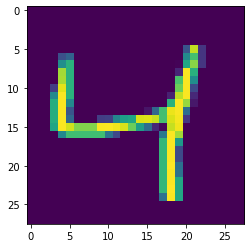

In [16]:
image = (train_images[2]).reshape(1,28,28,1)
model_pred = loaded_model.predict(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))